# Customer Churn Analysis
## Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
DF = pd.read_csv('Telecom_customer_churn.csv')
DF

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


By looking at the dataset we can see that it has categorical and numerical data in the dataset.

Our target variable churn is a categorical data, we will see into how many classes it has, however it will be a classification model

Also we have identified that there is a feature column named customer id, which has no relevance in the prediction. It is just an unique id given to each customer, hence will consider dropping the column

In [4]:
DF = DF.drop(['customerID'],axis=1)
DF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis(EDA)

In [5]:
DF.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
DF.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that we have object and float datatypes. TotalCharges is a float type data but it is showing object type lets change the data type.

The object datatypes will be encoded later

In [7]:
DF["TotalCharges"] = DF["TotalCharges"].str.strip()
DF["TotalCharges"] = pd.to_numeric(DF["TotalCharges"])

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
DF.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [10]:
DF['Churn'].unique()

array(['No', 'Yes'], dtype=object)

This show that target variable 'Churn' has only 2 classes.

In [11]:
for i in DF.columns:
        print(DF[i].value_counts())
        print(f'_____________________{i}_________________________')

Male      3555
Female    3488
Name: gender, dtype: int64
_____________________gender_________________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
_____________________SeniorCitizen_________________________
No     3641
Yes    3402
Name: Partner, dtype: int64
_____________________Partner_________________________
No     4933
Yes    2110
Name: Dependents, dtype: int64
_____________________Dependents_________________________
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
_____________________tenure_________________________
Yes    6361
No      682
Name: PhoneService, dtype: int64
_____________________PhoneService_________________________
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
_____________________MultipleLines_________________________
Fiber optic    3096
DSL            2421
No             1526
Name: Inter

In [12]:
#Grouping in MultipleLines column
DF["MultipleLines"].replace("No phone service","No",inplace=True)

#Grouping in OnlineSecurity column
DF["OnlineSecurity"].replace("No internet service","No",inplace=True)

#Grouping in OnlineBackup column
DF["OnlineBackup"].replace("No internet service","No",inplace=True)

#Grouping in DeviceProtection column
DF["DeviceProtection"].replace("No internet service","No",inplace=True)

#Grouping in TechSupport column
DF["TechSupport"].replace("No internet service","No",inplace=True)

#Grouping in StreamingTV column
DF["StreamingTV"].replace("No internet service","No",inplace=True)

#Grouping in StreamingMovies column
DF["StreamingMovies"].replace("No internet service","No",inplace=True)

In [13]:
DF.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Ther are 11 null values in the 'Total Charges' feature.

### Treating Null Values

In [14]:
DF["TotalCharges"] = DF["TotalCharges"].fillna(DF["TotalCharges"].mean())

In [15]:
DF.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

now there is no Null Value

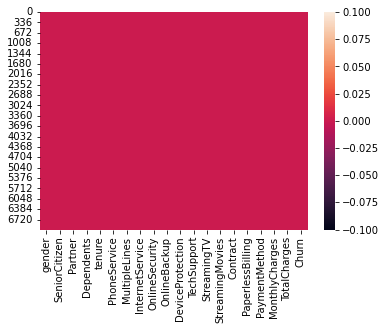

In [16]:
sns.heatmap(DF.isnull());

This heatmap clearly show that there is no Null value

### Statistical 

In [17]:
DF.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Above are the statistics about the numerical columns/ describe function takes only numerical columns.There is some difference between the mean and 2nd quantile value which means there are some outliers.

### Visualization

In [18]:
cat_col = []
num_col = []

for i in DF.dtypes.index:
    if DF.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
        
        
print('Categorical Columns \n',cat_col)
print('Numerical Columns \n',num_col)

Categorical Columns 
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Columns 
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Data Visualization

No     5174
Yes    1869
Name: Churn, dtype: int64


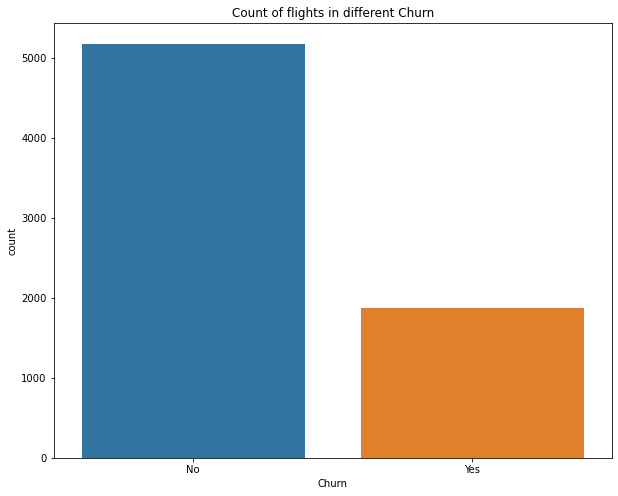

In [19]:
#Visualize the number of churned customers 
print(DF["Churn"].value_counts())
plt.figure(figsize =(10,8))
sns.countplot(DF['Churn'])
plt.title('Count of flights in different Churn');

From the count plot we can observe that the count of "No Churn" are high compared to the count of "Yes Churn". That is there are more number of customers who have not churned. This leads to class imbalance issue in the data, we will rectify it by using oversampling method in later part.

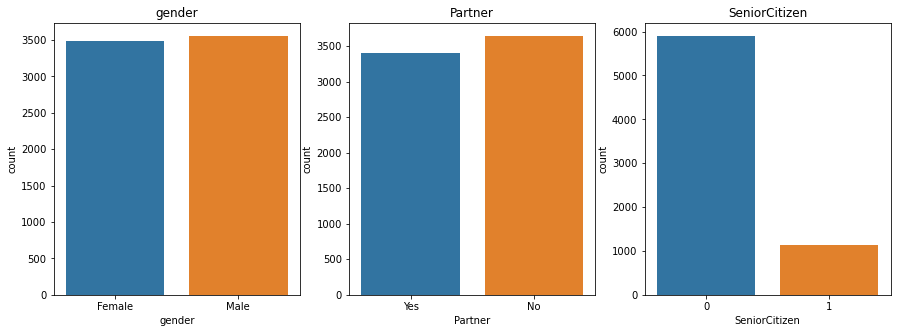

In [20]:
#Count plot for gender and Partner
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('gender')
sns.countplot(DF['gender'])
plt.subplot(1,3,2)
plt.title('Partner')
sns.countplot(DF['Partner'])
plt.subplot(1, 3, 3)
plt.title('SeniorCitizen')
sns.countplot(DF['SeniorCitizen'])
plt.show()

Both the genders has same count almost and having partner or not also has same count. In senior citizen we see low number in senior citizen

No     4933
Yes    2110
Name: Dependents, dtype: int64


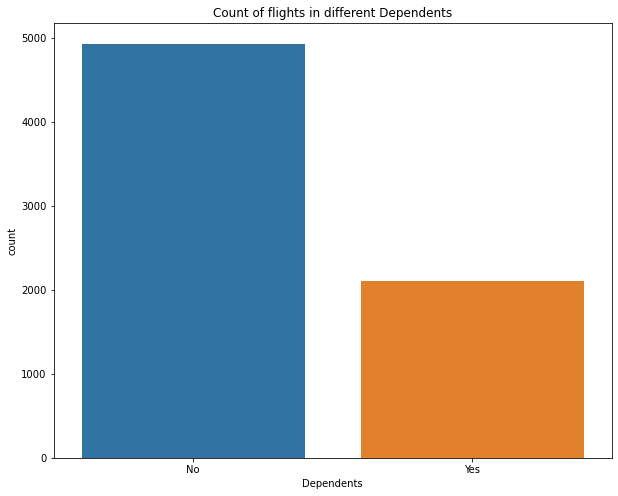

In [21]:
#Visualize the number of churned customers 
print(DF["Dependents"].value_counts())
plt.figure(figsize =(10,8))
sns.countplot(DF['Dependents'])
plt.title('Count of flights in different Dependents');

The customers who have dependents are very less in counts that means they do not have anyone dependent on them. Here around 70% of customers have dependents only 29.96% have no dependents.

Yes    6361
No      682
Name: PhoneService, dtype: int64


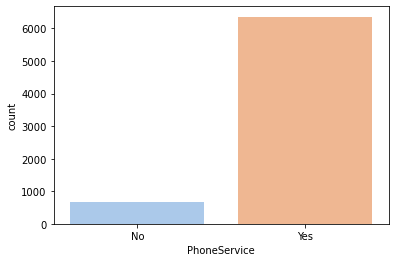

In [22]:
#Visualizing how many customers have Phone Service
print(DF["PhoneService"].value_counts())
sns.countplot(DF["PhoneService"],palette="pastel")
plt.show()

The customers who have phone services are large in numbers and who do not own phone services are very less in number.

No     4072
Yes    2971
Name: MultipleLines, dtype: int64


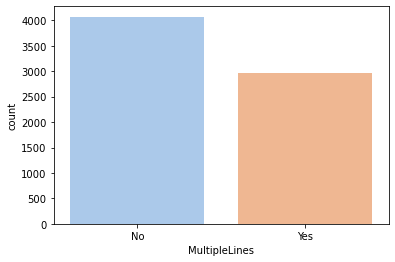

In [23]:
print(DF["MultipleLines"].value_counts())
sns.countplot(DF["MultipleLines"],palette="pastel")
plt.show()

The customer who do not have multiple lined are high in number as compared to ones hwo have multiple lines.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


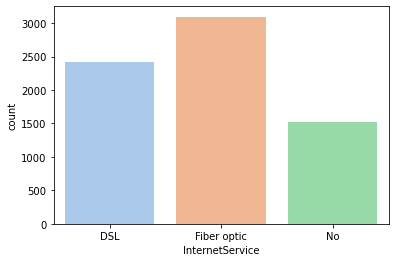

In [24]:
#Visualizing how many customers have Internet services
print(DF["InternetService"].value_counts())
sns.countplot(DF["InternetService"],palette="pastel")
plt.show()

Counts of Fiber Optic are higher

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64


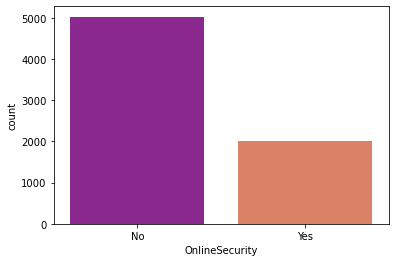

In [25]:
#Visualizing how many customers have OnlineSecurity
print(DF["OnlineSecurity"].value_counts())
sns.countplot(DF["OnlineSecurity"],palette="plasma")
plt.show()

Maximum people do not have the Online Security

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64


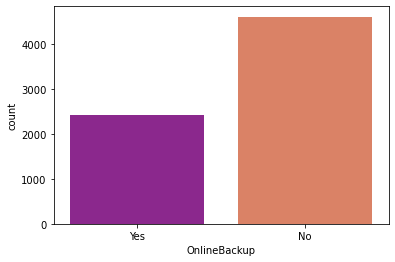

In [26]:
#Visualizing how many customers have Online backup
print(DF["OnlineBackup"].value_counts())
sns.countplot(DF["OnlineBackup"],palette="plasma")
plt.show()

This graph shows that most of the people do not have the Online Backup

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64


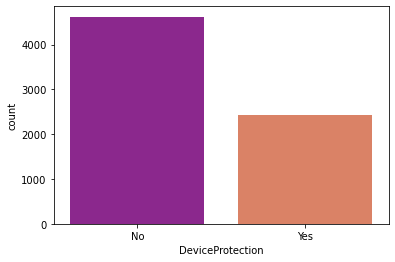

In [27]:
#Visualizing how many customers have DeviceProtection 
print(DF["DeviceProtection"].value_counts())
sns.countplot(DF["DeviceProtection"],palette="plasma")
plt.show()

This graph shows that most customers do not have device protection

No     4999
Yes    2044
Name: TechSupport, dtype: int64


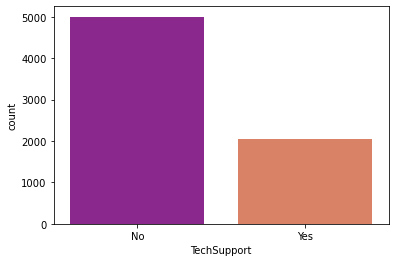

In [28]:
#Visualizing how many customers have TechSupport
print(DF["TechSupport"].value_counts())
sns.countplot(DF["TechSupport"],palette="plasma")
plt.show()

This shows that most customers do not have Tech Support

No     4336
Yes    2707
Name: StreamingTV, dtype: int64


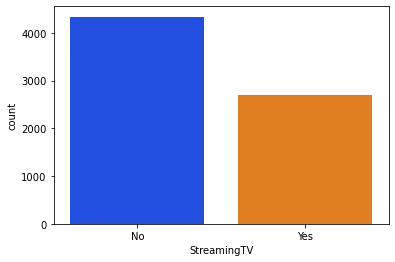

In [29]:
# Visualizing how many customers have StreamingTV
print(DF["StreamingTV"].value_counts())
sns.countplot(DF['StreamingTV'],palette='bright');

This shows that ,ost people do not have the Streaming TV

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


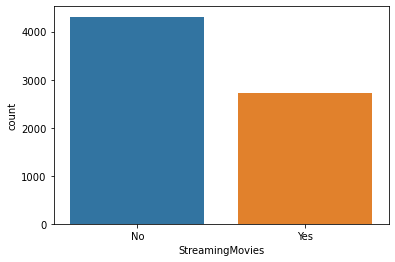

In [30]:
#Visualizing how many customers have StreamingMovies
print(DF['StreamingMovies'].value_counts())
sns.countplot(DF['StreamingMovies']);

This is showing that most customers do not have StreamingMovies.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


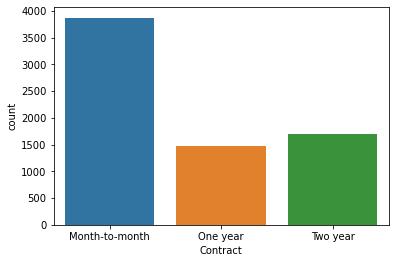

In [31]:
#Visualizing how many customers have Contract
print(DF["Contract"].value_counts())
sns.countplot(DF["Contract"]);

Most of the customers prefer Month to Month contract compared to 1 year and 2 years contract.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


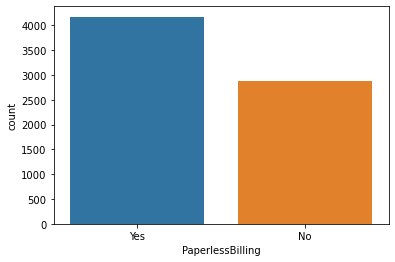

In [32]:
#Visualizing how many customers have PaymentMethod
print(DF["PaperlessBilling"].value_counts())
sns.countplot(DF["PaperlessBilling"])
plt.show()

This shows that most of the people opt for Paperless Billing

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


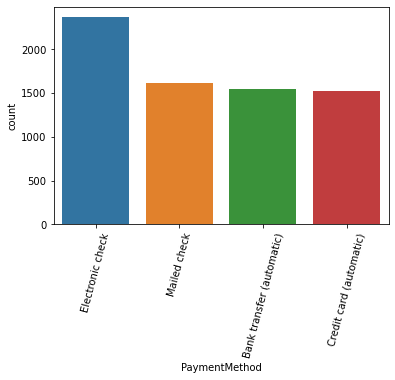

In [33]:
# Visualizing how many customers have Contract
print(DF["PaymentMethod"].value_counts())
sns.countplot(DF["PaymentMethod"])
plt.xticks(rotation=75);

This shows that most of the people opt for electronic check

### Visualizing the disribution of the numerical columns

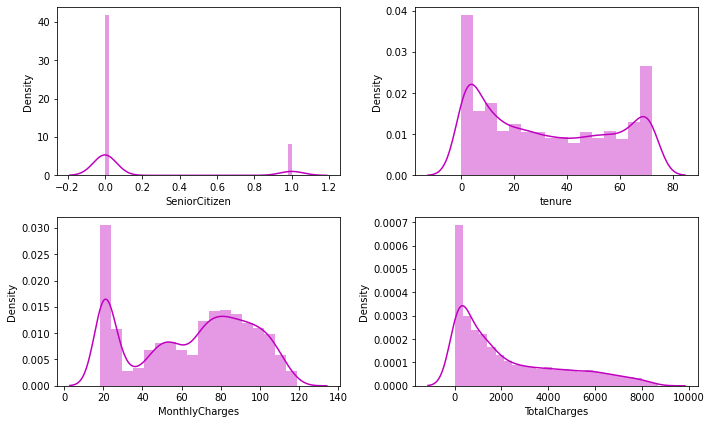

In [34]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(DF[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data almost looks normal in all the columns except SeniorCitizen. And the data in the column TotalCharges is skewed to right. Other two columns tenure and MonthlyCharges do not have skewness.

### Bivariate Analysis

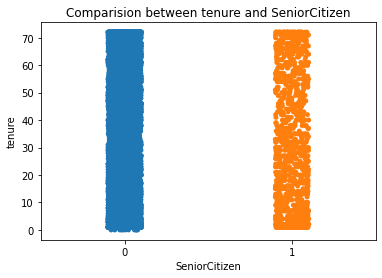

In [35]:
#Comparing tenure and SeniorCitizen 
plt.title("Comparision between tenure and SeniorCitizen")
sns.stripplot( x = "SeniorCitizen",y = "tenure", data = DF)
plt.show()

There is no significant difference between the features, here both the feature are in equal length

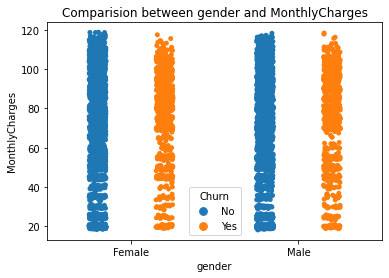

In [36]:
#Comparing gender and MonthlyCharges 
plt.title("Comparision between gender and MonthlyCharges")
sns.stripplot( x = "gender",y = "MonthlyCharges", data = DF,hue="Churn",split=True)
plt.show()

Most both male and female customers with monthly charges above 60 have high chances of getting churned.

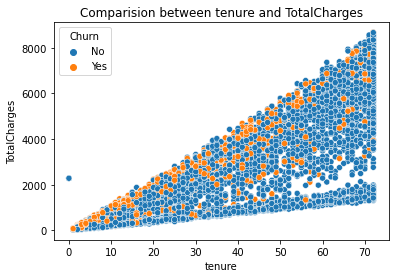

In [37]:
plt.title("Comparision between tenure and TotalCharges")
sns.scatterplot(x = 'tenure',y = 'TotalCharges',data = DF,hue='Churn');

Here we can notice the strong linear relation between the features. As the tenure increases, TotalCharges also increases rapidly. If the customers have low tenure services then there is high chance of churn.

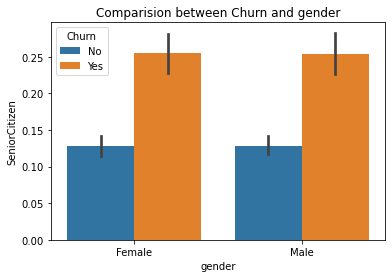

In [38]:
# Comparing gender and SeniorCitiZen on the Basis of Churn
plt.title('Comparision between Churn and gender')
sns.barplot(x = 'gender',y= 'SeniorCitizen',data=DF,hue='Churn');

The Customer's Churns remains unaffected in gender and SeniorCitizen Case.

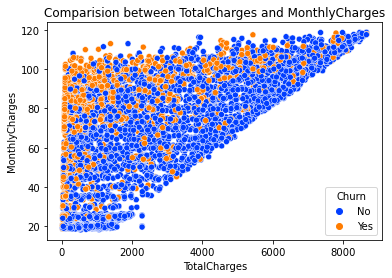

In [39]:
#Comparing TotalCharges and MonthlyCharges 
plt.title("Comparision between TotalCharges and MonthlyCharges")
sns.scatterplot( x = "TotalCharges",y = "MonthlyCharges", data = DF,hue="Churn",palette="bright")
plt.show()

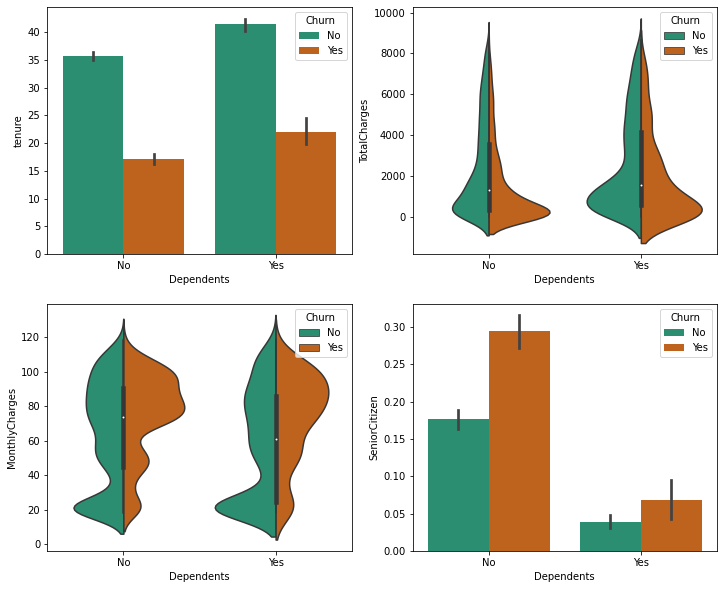

In [40]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Churn level in tenure
sns.barplot(x='Dependents',y='tenure',ax=axes[0,0],data=DF,palette="Dark2",hue="Churn")

# Checking Churn level in TotalCharges
sns.violinplot(x='Dependents',y='TotalCharges',ax=axes[0,1],data=DF,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in MonthlyCharges
sns.violinplot(x='Dependents',y='MonthlyCharges',ax=axes[1,0],data=DF,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in SeniorCitizen
sns.barplot(x='Dependents',y='SeniorCitizen',ax=axes[1,1],data=DF,palette="Dark2",hue="Churn")
plt.show()

The customers who have dependents with high tenure, then the churned level is high 80-110.

The customers who have total charges in the range of 0-2000 with dependents then the chance of getting churned is high.

The customers having Monthly charges between 80-110 with dependents have high churn rate and when the customers have no dependents and having monthly charges around 20 then teh ratio of churn is very high.

If the customer is a senior citizen and have no dependents then there is a tendancy of grtting churned.

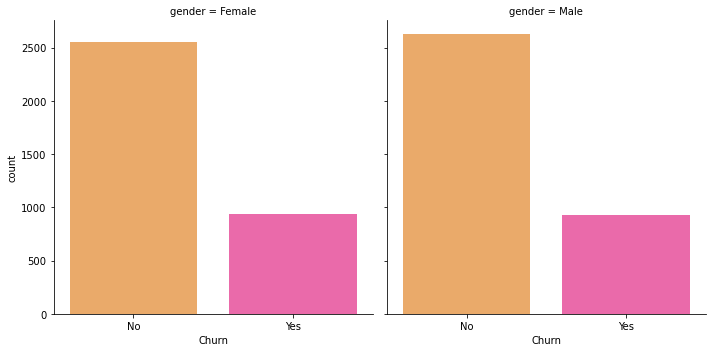

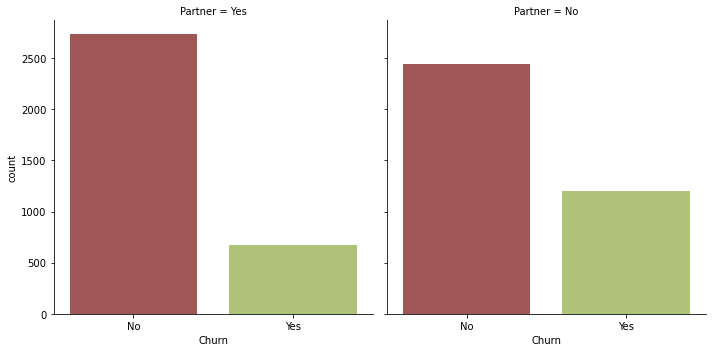

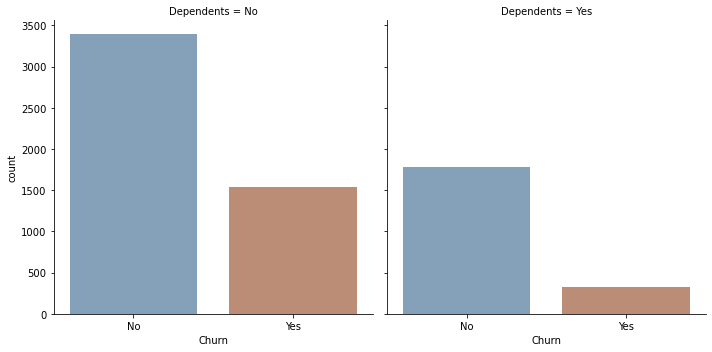

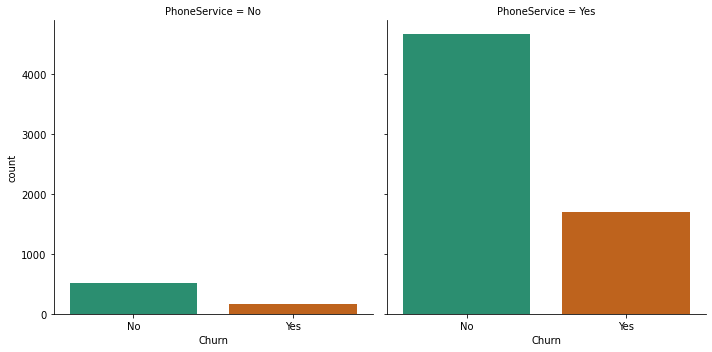

In [41]:
# Checking Churn level and gender
sns.catplot(x='Churn',col='gender',data=DF,kind="count",palette="spring_r")

# Checking Churn level and Partner
sns.catplot(x='Churn',col='Partner',data=DF,palette="tab20b_r",kind="count")

# Checking Churn level in Dependents
sns.catplot(x='Churn',col='Dependents',data=DF,palette="twilight_shifted",kind="count")

# Checking Churn level in PhoneService
sns.catplot(x='Churn',col='PhoneService',data=DF,palette="Dark2",kind="count")
plt.show()

In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level.

In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.

The customers who do not have any dependency have high churn rate compared to the customers who have dependents.

In the last plot we can notice the customers who have phone service have high tendency of getting churned.

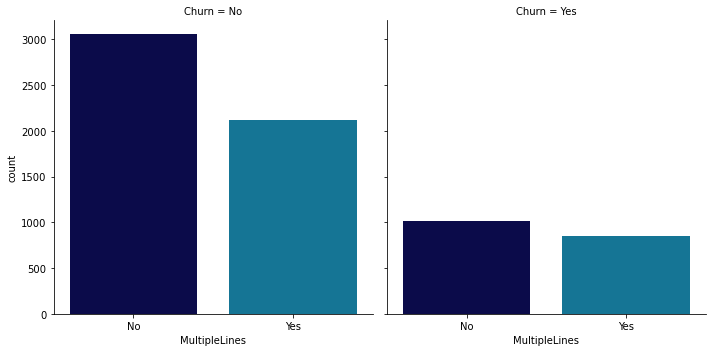

In [42]:
# Checking Churn level and MultipleLines
sns.catplot(x= 'MultipleLines',col='Churn',palette="ocean",kind="count",data=DF)
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

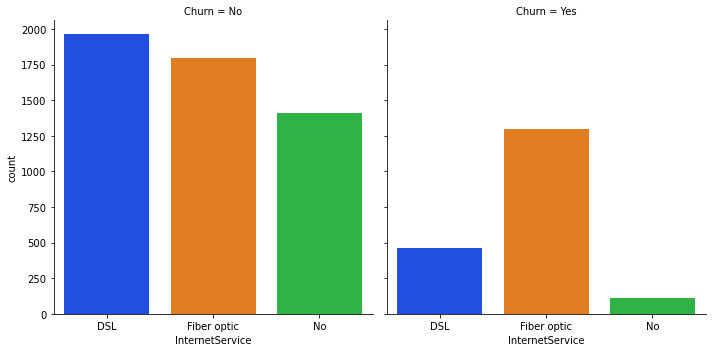

In [43]:
# Checking Churn level in InternetService
sns.catplot(x='InternetService',col='Churn',palette="bright",kind="count",data=DF)
plt.show()

Ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and and need to be focused on. And the customers who own DSL service they have very less churn rate.

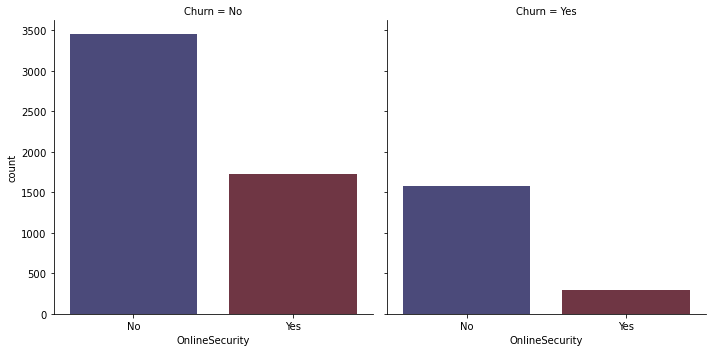

In [44]:
# Checking Churn level in OnlineSecurity
sns.catplot(x='OnlineSecurity',col='Churn',palette="icefire",kind="count",data=DF)
plt.show()

Churm level is high when you are not opting for Online Security

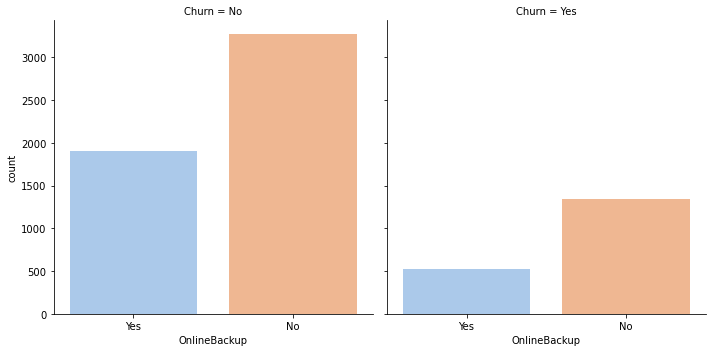

In [45]:
# Checking Churn level in OnlineBackup
sns.catplot(x='OnlineBackup',col='Churn',palette="pastel",kind="count",data=DF)
plt.show()

Churn level is low when you do not have online Back up

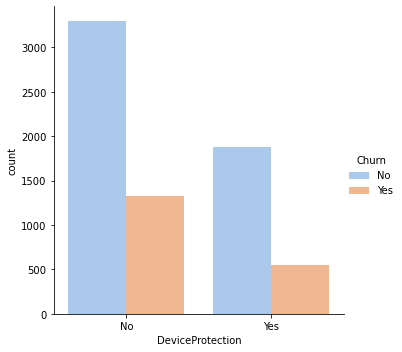

In [46]:
# Checking Churn level in DeviceProtecion
sns.catplot(x='DeviceProtection',hue='Churn',palette="pastel",kind="count",data=DF)
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others.

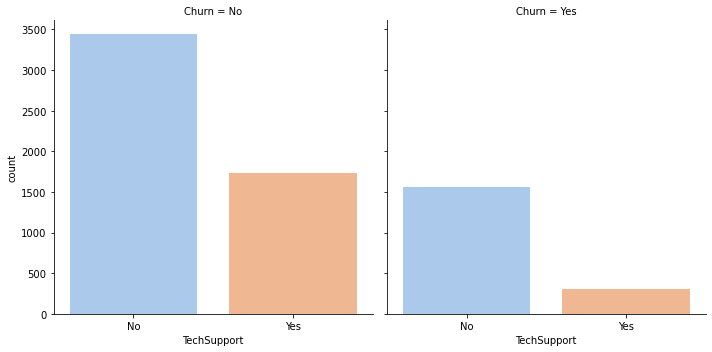

In [47]:
# Checking Churn level in TechSupport
sns.catplot(x = 'TechSupport',col= 'Churn',palette='pastel',kind='count',data = DF);

Here we can clearly see that the customers who do not have any techsupport then they have high churn ratio.

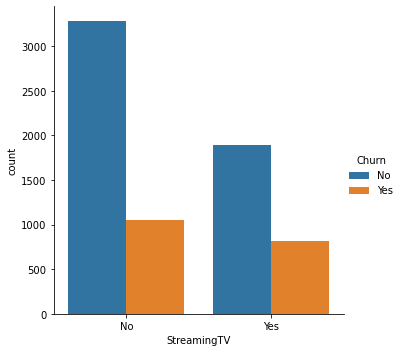

In [48]:
# Checking Churn level is StreamingTV
sns.catplot(x = 'StreamingTV',hue= 'Churn',kind='count',data=DF);

The churn rate is nearly same if the customer own StreamingTV or not

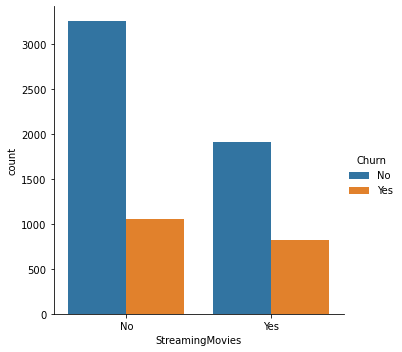

In [49]:
# Checking Churn level in StreamingMovies
sns.catplot(x='StreamingMovies',hue='Churn',kind="count",data=DF)
plt.show()

The customers who are existing in the company they do not own StreamingMovies in their devices. And the churn rate is low when the customer do not have internet services

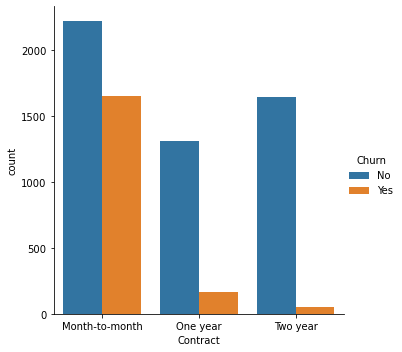

In [50]:
# Checking Churn level in Contract
sns.catplot(x='Contract',hue='Churn',kind="count",data=DF)
plt.show()

The customers who have churned are mostly having month to month contract.

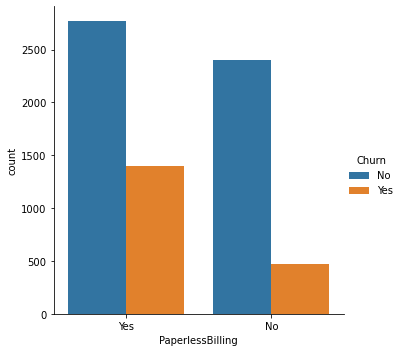

In [51]:
# Checking Churn level in PaperlessBilling
sns.catplot(x='PaperlessBilling',hue='Churn',kind="count",data=DF)
plt.show()

The customers who prefer paperless billing they have high churn rate.

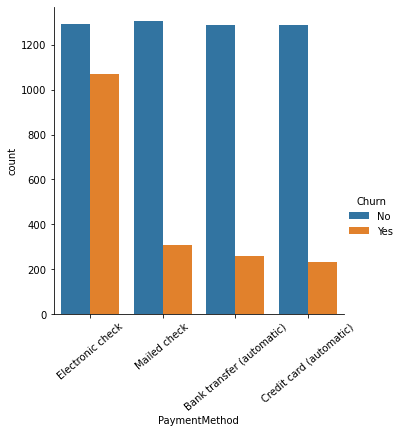

In [52]:
# Checking Churn level in PaymentMethod
sns.catplot(x='PaymentMethod',hue='Churn',kind="count",data=DF)
plt.xticks(rotation=40)
plt.show()

Customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.

### Multivariate Analysis

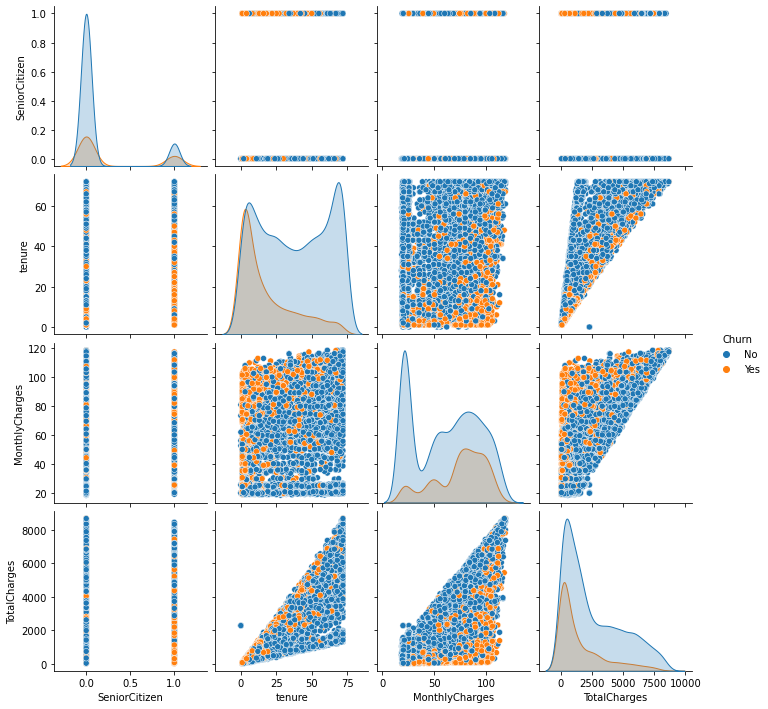

In [53]:
sns.pairplot(DF,hue="Churn")
plt.show()

The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots.

The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.

There are no outliers in any of the columns but let's plot box plot to identify the outliers.

## Pre-processing Data
### Identifying the outliers

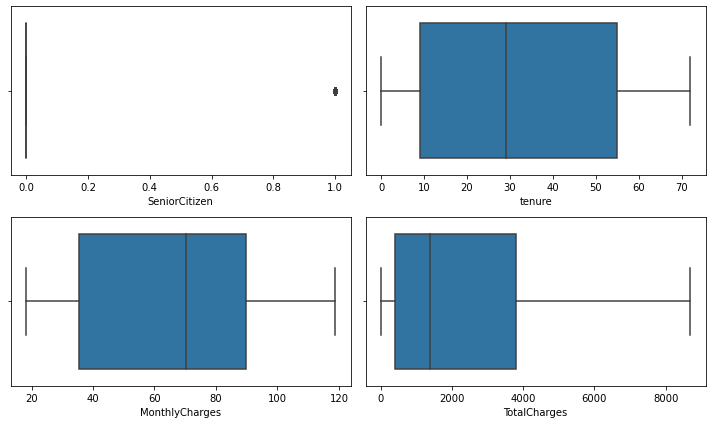

In [54]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(DF[column])
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers.

### Checking for skewness

In [55]:
DF.skew().sort_values()

MonthlyCharges   -0.220524
tenure            0.239540
TotalCharges      0.962394
SeniorCitizen     1.833633
dtype: float64

The columns SeniorCitizen and TotalCharges have skewness in the data. Since SeniorCitizen is categorical no need to remove skewness but in TotalCharges. Since TotalCharges is continuous in nature, lets use cube root method to remove skewness.

### Removing skewness

In [56]:
DF['TotalCharges'] = np.cbrt(DF['TotalCharges'])

In [57]:
DF.skew().sort_values()

MonthlyCharges   -0.220524
TotalCharges      0.011168
tenure            0.239540
SeniorCitizen     1.833633
dtype: float64

### Ordinal Encoding

In [58]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in DF.columns:
    if DF[i].dtypes == 'object':
        DF[i] = OE.fit_transform(DF[i].values.reshape(-1,1))

DF

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


we have converted the categorical columns into numerical columns using Ordinal Encoding method.

### Statistical

In [59]:
DF.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After encoding the categorical column we are able to see all the columns details here. The counts of all the columns are same that means no null values in the dataset. This describe method descrbes the count, mean, standard deviation, min, IQR and max values of all the columns.

### Correlation

In [60]:
cor = DF.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,-0.171026,0.490434,0.469982,0.040102
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,0.011124,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.409133,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,-0.170898,0.441780,0.491811,-0.082255


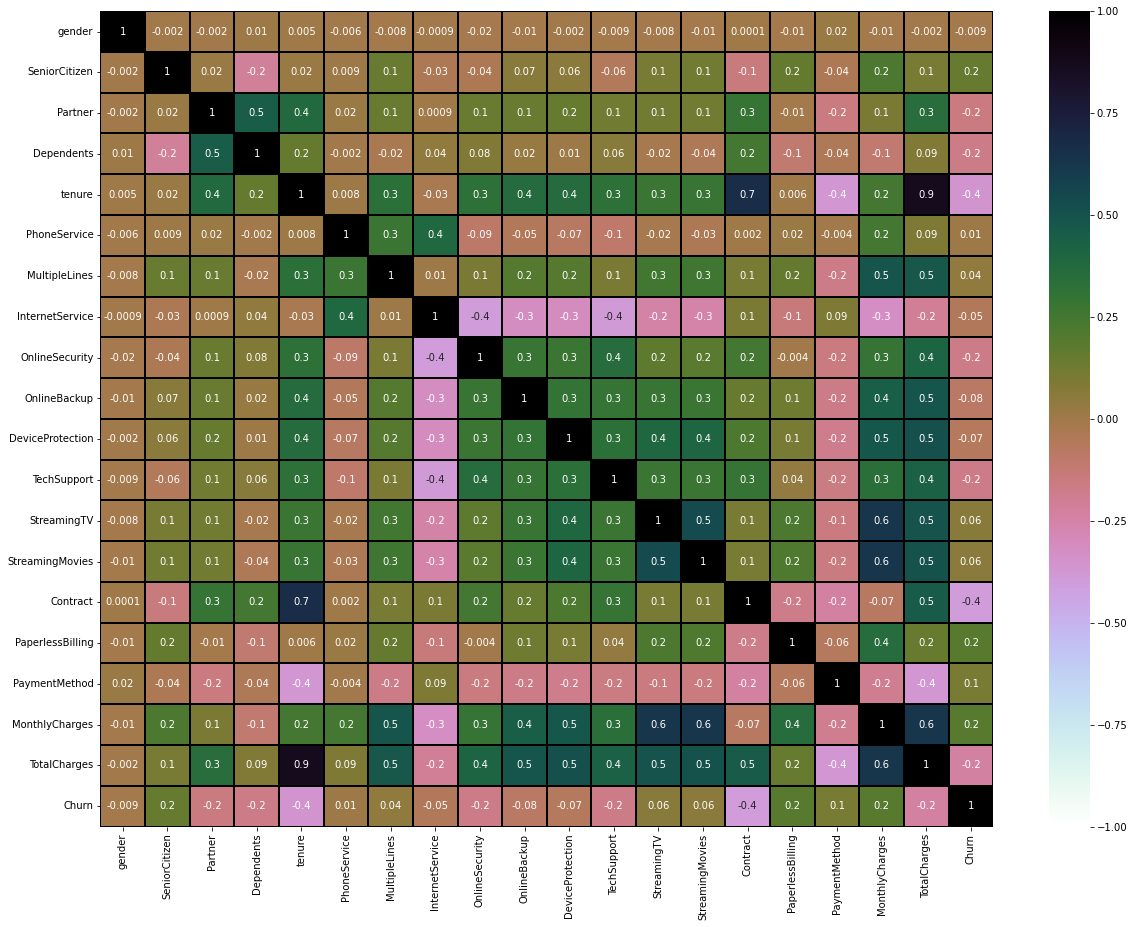

In [61]:
plt.figure(figsize=(20,15))
sns.heatmap(DF.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="cubehelix_r")
plt.yticks(rotation=0);

In [62]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.040102
PhoneService        0.011942
gender             -0.008612
InternetService    -0.047291
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
TotalCharges       -0.233781
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

### Visualizing the correlation between label and features using bar plot

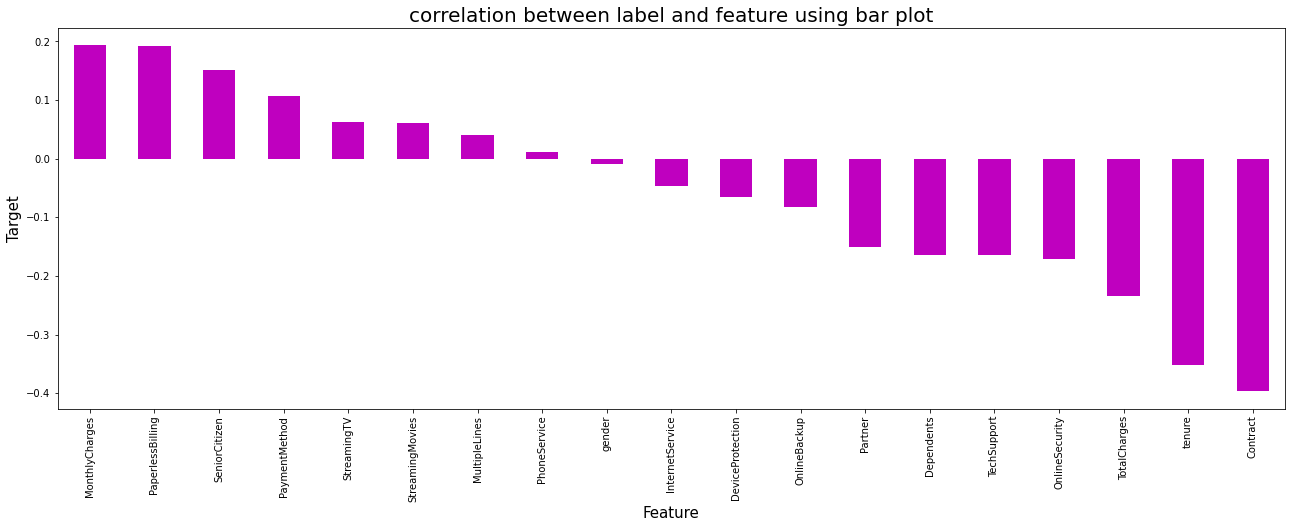

In [63]:
plt.figure(figsize=(22,7))
DF.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

### Data Pre-processing

In [64]:
X = DF.drop('Churn',axis = 1)
Y = DF['Churn']

### Standard Scalarization

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-1.183234,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,-1.183234,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-1.183234,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,-1.183234,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,0.172250,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,-1.183234,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,0.172250,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,-1.183234,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,0.172250,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,1.334863,0.320338,-0.942642


We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

### Checking VIF

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.001712,gender
1,1.149673,SeniorCitizen
2,1.462976,Partner
3,1.383916,Dependents
4,12.357689,tenure
5,1.712629,PhoneService
6,1.548863,MultipleLines
7,1.904736,InternetService
8,1.476713,OnlineSecurity
9,1.480046,OnlineBackup


In [67]:
# Dropping TotalCharges column
X.drop("TotalCharges",axis=1,inplace=True)

In [68]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.001700,gender
1,1.149607,SeniorCitizen
2,1.460871,Partner
3,1.382066,Dependents
4,2.754518,tenure
5,1.712012,PhoneService
6,1.538487,MultipleLines
7,1.897435,InternetService
8,1.464039,OnlineSecurity
9,1.469031,OnlineBackup


All the columns have VIF less than 10which means the data is free from multicollinearity problem. So we can move further to build our machine learning models.

### OverSampling

In [69]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(X,Y)

In [70]:
Y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

## Model

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
maxAccu=0
maxRS=0

for i in range(1,200):
    X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=.30, random_state=i)
    RF=RandomForestClassifier()
    RF.fit(X_train,Y_train)
    predRF=RF.predict(X_test)
    acc=accuracy_score(Y_test,predRF)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8673107890499195  on Random_state  102


### Train Test Split

In [72]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRS)

### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report

LOR = LogisticRegression()
LOR.fit(X_train,Y_train)

# [Prediction]
predLOR = LOR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predLOR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predLOR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLOR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLOR)))

print("-----------------------------------------------------")
# Accuracy Score
print(accuracy_score(Y_test, predLOR))
print("-----------------------------------------------------")
# Confusion Matrix
print(confusion_matrix(Y_test, predLOR))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predLOR))

R2 Score: 0.15222722463121652
Mean Absolute Error 0.21191626409017714
Mean Squared Error 0.21191626409017714
Root Mean Squared Error 0.46034363696067
-----------------------------------------------------
0.7880837359098228
-----------------------------------------------------
[[1170  400]
 [ 258 1277]]
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78      1570
         1.0       0.76      0.83      0.80      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



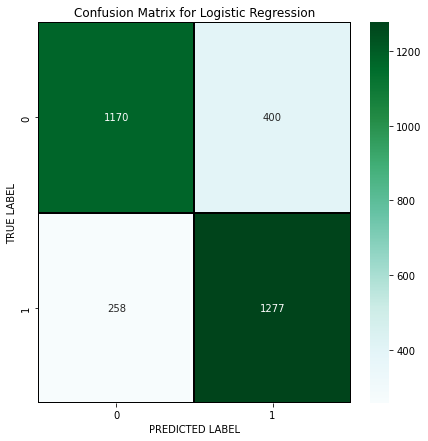

In [74]:
cm = confusion_matrix(Y_test,predLOR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Decission Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Checking accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

# [Prediction]
predDTC = DTC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predDTC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predDTC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predDTC)) 

R2 Score: 0.15222722463121652
Mean Absolute Error 0.21191626409017714
Mean Squared Error 0.21191626409017714
Root Mean Squared Error 0.46034363696067
-----------------------------------------------------
Accuracy Score:  0.7880837359098228
-----------------------------------------------------
Confusion Matrix:
 [[1232  338]
 [ 320 1215]]
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      1570
         1.0       0.78      0.79      0.79      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



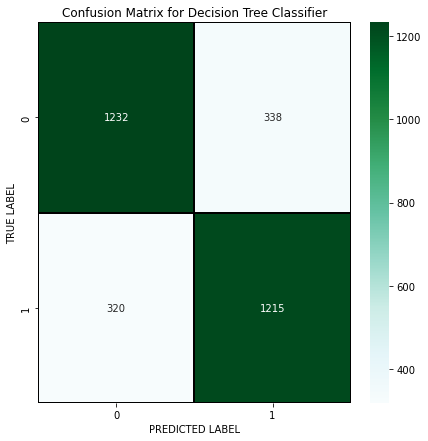

In [76]:
cm = confusion_matrix(Y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

# [Prediction]
predRFC = RFC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predRFC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predRFC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predRFC))

R2 Score: 0.4691757090396067
Mean Absolute Error 0.13268921095008052
Mean Squared Error 0.13268921095008052
Root Mean Squared Error 0.3642653029730948
-----------------------------------------------------
Accuracy Score:  0.8673107890499195
-----------------------------------------------------
Confusion Matrix:
 [[1359  211]
 [ 201 1334]]
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1570
         1.0       0.86      0.87      0.87      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



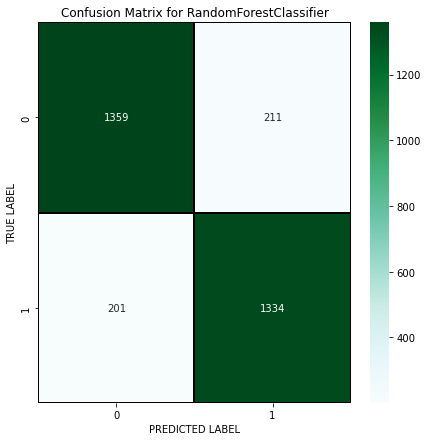

In [78]:
cm = confusion_matrix(Y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### KNeighborsClassifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predKNN))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predKNN))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predKNN))

R2 Score: 0.13934313989916813
Mean Absolute Error 0.2151368760064412
Mean Squared Error 0.2151368760064412
Root Mean Squared Error 0.4638284984845597
-----------------------------------------------------
Accuracy Score:  0.7848631239935587
-----------------------------------------------------
Confusion Matrix:
 [[1043  527]
 [ 141 1394]]
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.66      0.76      1570
         1.0       0.73      0.91      0.81      1535

    accuracy                           0.78      3105
   macro avg       0.80      0.79      0.78      3105
weighted avg       0.80      0.78      0.78      3105



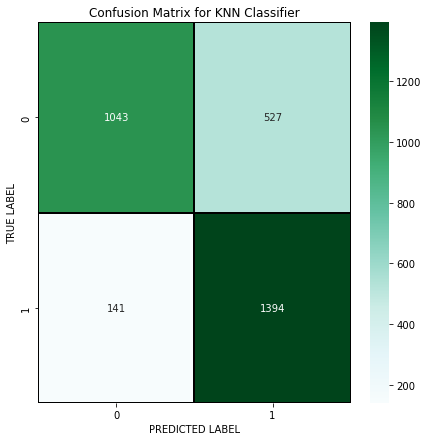

In [80]:
cm = confusion_matrix(Y_test,predKNN)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

### AdaBoost Classifier

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train,Y_train)

# [Prediction]
predADA = ADA.predict(X_test)
print('R2 Score:',r2_score(Y_test,predADA))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predADA))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predADA))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predADA)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predADA))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predADA))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predADA))

R2 Score: 0.3210087346210504
Mean Absolute Error 0.16972624798711755
Mean Squared Error 0.16972624798711755
Root Mean Squared Error 0.41197845573175007
-----------------------------------------------------
Accuracy Score:  0.8302737520128824
-----------------------------------------------------
Confusion Matrix:
 [[1230  340]
 [ 187 1348]]
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      1570
         1.0       0.80      0.88      0.84      1535

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



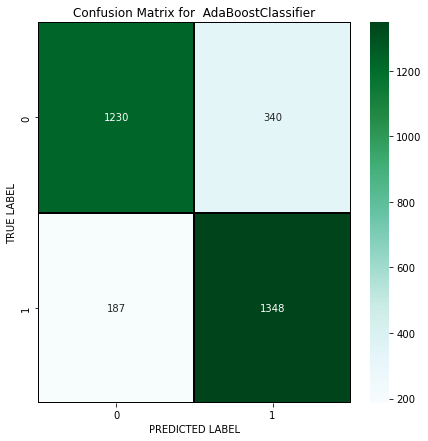

In [82]:
cm = confusion_matrix(Y_test,predADA)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoostClassifier')
plt.show()

### Gradient Boosting Classifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,Y_train)

# [Prediction]
predGBC = GBC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGBC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGBC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGBC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGBC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predGBC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predGBC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predGBC))

R2 Score: 0.4227930040042326
Mean Absolute Error 0.14428341384863125
Mean Squared Error 0.14428341384863125
Root Mean Squared Error 0.37984656619302387
-----------------------------------------------------
Accuracy Score:  0.8557165861513688
-----------------------------------------------------
Confusion Matrix:
 [[1305  265]
 [ 183 1352]]
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1570
         1.0       0.84      0.88      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



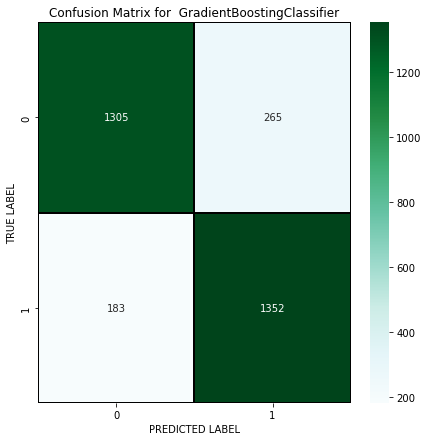

In [84]:
cm = confusion_matrix(Y_test,predGBC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  GradientBoostingClassifier')
plt.show()

### Naive Bias Classifier

In [85]:
from sklearn.naive_bayes import GaussianNB
GNB = GradientBoostingClassifier()
GNB.fit(X_train,Y_train)

# [Prediction]
predGNB = GNB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGNB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGNB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGNB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGNB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predGNB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predGNB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predGNB))

R2 Score: 0.4227930040042326
Mean Absolute Error 0.14428341384863125
Mean Squared Error 0.14428341384863125
Root Mean Squared Error 0.37984656619302387
-----------------------------------------------------
Accuracy Score:  0.8557165861513688
-----------------------------------------------------
Confusion Matrix:
 [[1305  265]
 [ 183 1352]]
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1570
         1.0       0.84      0.88      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



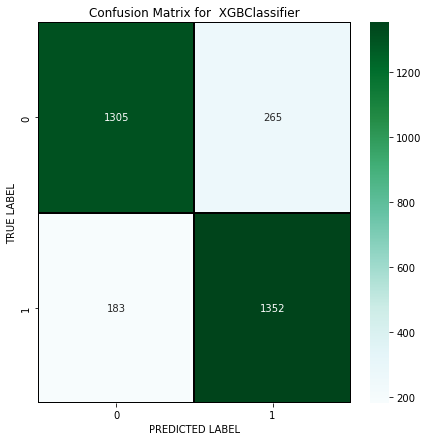

In [86]:
cm = confusion_matrix(Y_test,predGNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGBClassifier')
plt.show()

### XGBClassifier

In [87]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)

# [Prediction]
predXGB = XGB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predXGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predXGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predXGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predXGB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predXGB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predXGB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predXGB))

R2 Score: 0.4343886802630761
Mean Absolute Error 0.14138486312399356
Mean Squared Error 0.14138486312399356
Root Mean Squared Error 0.3760117858844235
-----------------------------------------------------
Accuracy Score:  0.8586151368760064
-----------------------------------------------------
Confusion Matrix:
 [[1353  217]
 [ 222 1313]]
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1570
         1.0       0.86      0.86      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



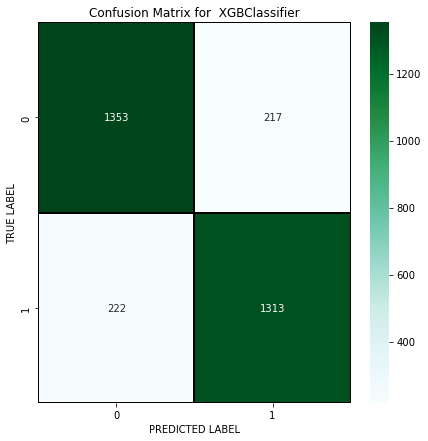

In [88]:
cm = confusion_matrix(Y_test,predXGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGBClassifier')
plt.show()

### Support Vector Machine classifier

In [89]:
from sklearn.svm import SVC

# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train,Y_train)

# [Prediction]
predsvc = svc.predict(X_test)
print('R2 Score:',r2_score(Y_test,predsvc))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predsvc))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predsvc))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predsvc)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predsvc))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predsvc))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predsvc))

R2 Score: 0.2308201414967117
Mean Absolute Error 0.19227053140096617
Mean Squared Error 0.19227053140096617
Root Mean Squared Error 0.43848663765383566
-----------------------------------------------------
Accuracy Score:  0.8077294685990338
-----------------------------------------------------
Confusion Matrix:
 [[1174  396]
 [ 201 1334]]
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80      1570
         1.0       0.77      0.87      0.82      1535

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



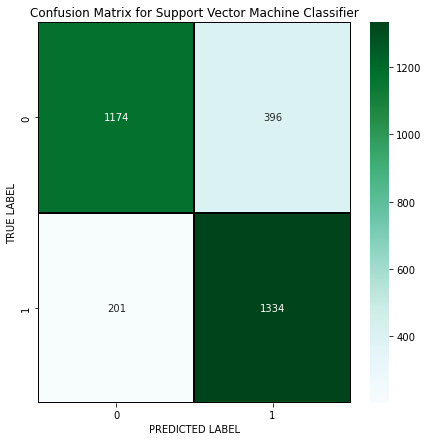

In [90]:
cm = confusion_matrix(Y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### Extra Trees Classifier

In [91]:
from sklearn.ensemble import ExtraTreesClassifier

# Checking accuracy for Support Vector Machine Classifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train,Y_train)

# [Prediction]
predETC = ETC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predETC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predETC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predETC))

R2 Score: 0.4691757090396067
Mean Absolute Error 0.13268921095008052
Mean Squared Error 0.13268921095008052
Root Mean Squared Error 0.3642653029730948
-----------------------------------------------------
Accuracy Score:  0.8673107890499195
-----------------------------------------------------
Confusion Matrix:
 [[1353  217]
 [ 195 1340]]
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1570
         1.0       0.86      0.87      0.87      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



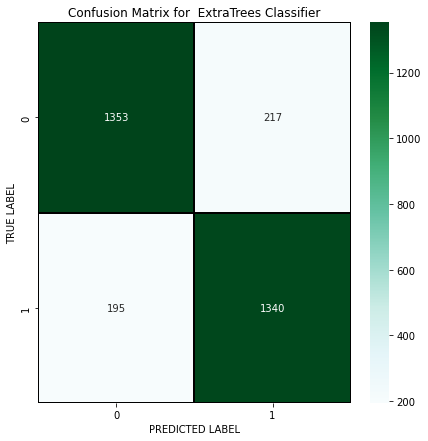

In [92]:
cm = confusion_matrix(Y_test,predETC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

### Cross Validation Score

In [93]:
from sklearn.model_selection import cross_val_score

#cv score for Logistic Regression
print('Logistic Regression',cross_val_score(LOR,X,Y,cv=5).mean())

# cv score for Decision Tree Classifier
print('Decision Tree Classifier',cross_val_score(DTC,X,Y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier',cross_val_score(RFC,X,Y,cv=5).mean())

# cv score for KNeighbors Classifier
print('KNeighbors Classifier',cross_val_score(KNN,X,Y,cv=5).mean())

# cv score for Support Vector  Classifier
print('Support Vector  Classifier',cross_val_score(svc,X,Y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier',cross_val_score(ETC,X,Y,cv=5).mean())

# cv score for Naive Bias Classifier
print('Naive Bias Classifier:',cross_val_score(GNB,X,Y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(ADA,X,Y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier',cross_val_score(XGB,X,Y,cv=5).mean())

Logistic Regression 0.7747405804106163
Decision Tree Classifier 0.7881808523803187
Random Forest Classifier 0.853798493052491
KNeighbors Classifier 0.7853715884123349
Support Vector  Classifier 0.7990963918717296
Extra Trees Classifier 0.8660684640763232
Naive Bias Classifier: 0.8361134109922645
AdaBoosting Classifier: 0.8082787315863575
Gradient Boosting Classifier 0.8370850582441983


### Hyper Parameter Tuning

In [94]:
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [95]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [96]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

In [97]:
Cust_Churn = ExtraTreesClassifier(criterion = 'gini', max_depth = 20, n_estimators = 200,n_jobs = -2, random_state = 1000)
Cust_Churn.fit(X_train, Y_train)
pred = Cust_Churn.predict(X_test)
acc=accuracy_score(Y_test,pred)
print('After HyperParameter tuning we have received an accuracy score of',acc*100)

After HyperParameter tuning we have received an accuracy score of 86.9243156199678


### Plotting ROC and compare AUC for the final model

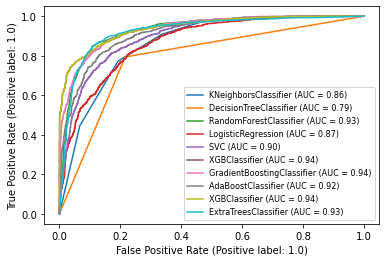

In [98]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(KNN,X_test,Y_test)
plot_roc_curve(DTC, X_test, Y_test, ax=disp.ax_)     
plot_roc_curve(RFC, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(LOR, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(GNB, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(ADA, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(ETC, X_test, Y_test, ax=disp.ax_)

plt.legend(prop={'size':8}, loc='lower right')
plt.show()

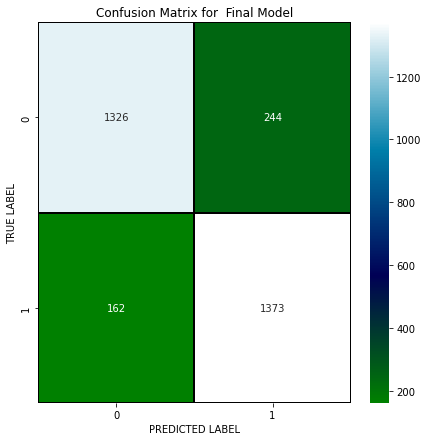

In [99]:
cm = confusion_matrix(Y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

### Saving The Model

In [100]:
import joblib
joblib.dump(Cust_Churn,"Customer_Churn_Analysis(E8).pkl")

['Customer_Churn_Analysis(E8).pkl']

### Predicting the saved model

In [103]:
model=joblib.load("Customer_Churn_Analysis(E8).pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1., 0., 0., ..., 1., 1., 0.])

In [105]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3100,1.0,1.0
3101,1.0,0.0
3102,1.0,1.0
3103,1.0,1.0


We can see that the Actual Value and Predicted Value is almost same.